# Plot Template

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Load data and assign data variables
Read the data and assign it to [NumPy arrays](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html). Calculate the model function and residuals.

In [3]:
# Load data
current, voltage, alpha_voltage = np.genfromtxt('Example-Data.csv', skip_header=1, delimiter=',',unpack=True)

# Model behavior expected for slope = 2.03 mV/Hz
current_model = np.linspace(0,120)
voltage_model = 2.03*current_model

# Compute residuals
res = voltage - 2.03*current
normres = res/alpha_voltage

# Check data
print(current)
print(voltage)
print(alpha_voltage)
print(normres)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110.]
[ 16.  45.  64.  75.  70. 115. 142. 167. 183. 160. 221.]
[ 5.  5.  5.  5. 30.  5.  5.  5.  5. 30.  5.]
[-0.86        0.88        0.62       -1.24       -1.05       -1.36
 -0.02        0.92        0.06       -1.43333333 -0.46      ]


#### Adjust format as necessary
A report that uses 8.5" x 11" paper with 1" margins has a 6.5" text width. We set the figure width to 80% of this. Usually we we use an 3:2 aspect ratio to set the height, but in this case we want to add residuals so make the plot a bit taller. Normally the font sizes for the axis labels, tick labels, and legend should be the same or less than that of the report text, which we assume here is 12 [points](https://en.wikipedia.org/wiki/Point_%28typography%29) (1 point = 1/72 inch). We also explicitly set the data marker size to 5 points and the model line width to 1.25 points—normally, the default marker size is 6 points and the default line width is 1.5 points. Finally, we set [`zorder=3`](https://matplotlib.org/gallery/misc/zorder_demo.html) in the first call to `plot` to put the markers on top of the model line (alternatively, we could also just change the order of the `plot` commands). The command [tight_layout](https://matplotlib.org/api/tight_layout_api.html) crops the figure for export.

In [33]:
# Set figure width to 80% of the 6.5" text width
w_text = 6.5
w = 0.8*w_text
h = (2.8/3.0)*w
fig = plt.figure(figsize=(w,h))

<Figure size 374.4x349.44 with 0 Axes>

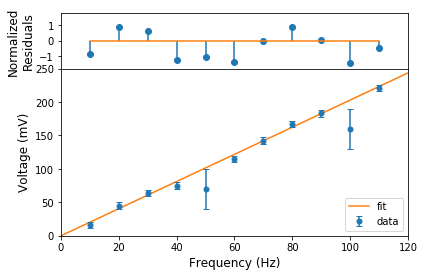

In [34]:
# Setup subplots
# Use grid_spec_kw to specify size of subplots
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

# residual plot      
a0.stem(current, normres, use_line_collection=True, markerfmt='o', basefmt='C1-')
#a0.set_title('Sample Plot', fontsize=14)
a0.set_ylabel('Normalized\nResiduals', fontsize=12)
a0.set_xlim(0,120)
a0.set_ylim(-1.8,1.8);
a0.set_xticks([])

# Plot data with circular markers
# Set zorder=3 to put markers on top of model curve
# Set marker size to 5 points
a1.errorbar(current, voltage, yerr=alpha_voltage, fmt='o', markersize=5, zorder=3, capsize=3);
a1.plot(current_model, voltage_model, '-', linewidth=1.25);

# Set axis limits to include origin
a1.set_xlim(0,120)
a1.set_ylim(0,250);
a1.set_xlabel('Voltage ()', fontsize=12)
a1.set_ylabel('Voltage (mV)', fontsize=12);
a1.legend(['fit', 'data'], fontsize=10,loc=4)

# Crop figure
f.tight_layout();

# Adjust spacing between subplots
f.subplots_adjust(hspace=0)

# Save PDF for article
f.savefig('resistance_report.pdf')
